In [2]:
import pandas as pd
from prophet import Prophet

Install necessary packages, namely pandas and prophet if you do not have already

In [3]:
df = pd.read_csv('GNPDataset.csv', on_bad_lines='skip')

Data is good, but need to drop last two columns and then reformat csv with date in one column and the visitor number in the second column to feed prophet properly

In [4]:
#taken and modified from https://github.com/fred-lindsey/projects/blob/main/TSA_NPS_visitor_prediction/wrangle.py

# set 'Year' as the index, so that I can stack the dataframe, ie reduce the dimensions so that I can merge the dataframes
df = df.set_index('Year')
# drop 'Textbox4' and 'AnnualTotal' column. This is a yearly % change and yearly total column for the dataset
df = df.drop(columns=['Textbox4','AnnualTotal'])
# now I'm going to stack, meaning move the columns headers under the index, to reduce the dimensionality of the dataframe
df = df.stack(level=0)
# stacking produces a series when I'm done, and it will need to be converted back into a DF
df = df.to_frame()
# now add a title to the DF's only column
df.columns = ['glacier_national_park_visits']
# reset the index to seperate the current multi-index into distinct year and month columns
df = df.reset_index(drop=False)
# create a composite date column
df['date'] = df.Year.astype(str) + "-" + df.level_1
# convert the date column to datetime object
df.date = pd.to_datetime(df.date)
# set the date as the index and sort index
df = df.set_index('date').sort_index()
# drop Year and level_1 columns that are no longer needed
df = df.drop(columns=['Year', 'level_1'])
display(df)

,glacier_national_park_visits
date,
1979-01-01,"6,357"
1979-02-01,"3,480"
1979-03-01,"11,790"
1979-04-01,"15,000"
1979-05-01,"65,923"
...,...
2021-08-01,"670,628"
2021-09-01,"533,388"
2021-10-01,"149,564"


In [ ]:
df.to_csv(r'C:\Users\divergence\OneDrive - DIVERGENCE ONE\Documents\GitHub\2022-07-DSI-WDX\douglas481\ML and Python Capstone\IndexedData.csv', index=True)

In [5]:
df = pd.read_csv('IndexedData.csv')

In [6]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].str.replace(r',', '')
df['y'] = pd.to_numeric(df['y'])
display(df)

,ds,y
0,1979-01-01,6357
1,1979-02-01,3480
2,1979-03-01,11790
3,1979-04-01,15000
4,1979-05-01,65923
...,...,...
511,2021-08-01,670628
512,2021-09-01,533388
513,2021-10-01,149564
514,2021-11-01,26300


Data has been cleaned and formatted to be fed to Prophet, so next we have to train the model, for this one I will build a forecast with uncertainty built into it

In [20]:
m = Prophet(mcmc_samples=300)
model = m.fit(df, show_progress=False)
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.to_csv(r'C:\Users\divergence\OneDrive - DIVERGENCE ONE\Documents\GitHub\2022-07-DSI-WDX\douglas481\ML and Python Capstone\ForecastedData.csv', index=False)

10:22:07 - cmdstanpy - INFO - CmdStan installation c:\ProgramData\Anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
10:22:07 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
10:22:07 - cmdstanpy - INFO - CmdStan start processing
10:22:07 - cmdstanpy - INFO - Chain [1] start processing
10:22:07 - cmdstanpy - INFO - Chain [2] start processing
10:22:07 - cmdstanpy - INFO - Chain [3] start processing
10:22:07 - cmdstanpy - INFO - Chain [4] start processing
10:22:14 - cmdstanpy - INFO - Chain [4] done processing
10:22:14 - cmdstanpy - INFO - Chain [1] done processing
10:22:14 - cmdstanpy - INFO - Chain [3] done processing
10:22:14 - cmdstanpy - INFO - Chain [2] done processing
10:22:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Excepti

In [8]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,132073.818579,-100635.392758,46215.218409,117870.513363,146841.840873,-159524.527220,-172224.765145,-147179.406959,-159524.527220,-172224.765145,-147179.406959,0.0,0.0,0.0,-27450.708640
1,1979-02-01,132370.701555,-103578.614039,51272.540760,118266.137328,146848.293048,-159735.247725,-170556.037147,-148415.184278,-159735.247725,-170556.037147,-148415.184278,0.0,0.0,0.0,-27364.546170
2,1979-03-01,132638.853919,-99980.256793,44960.658244,118847.170794,146965.517457,-158326.739235,-176500.043597,-139212.199598,-158326.739235,-176500.043597,-139212.199598,0.0,0.0,0.0,-25687.885316
3,1979-04-01,132935.736894,-85776.934283,56904.474289,119285.100888,147192.037913,-147358.787315,-164823.618567,-130209.044880,-147358.787315,-164823.618567,-130209.044880,0.0,0.0,0.0,-14423.050421
4,1979-05-01,133223.042999,-6579.038796,144668.349386,119885.140836,147355.180646,-67190.225788,-85283.741237,-49175.743295,-67190.225788,-85283.741237,-49175.743295,0.0,0.0,0.0,66032.817211


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
876,2022-11-27,253718.283867,-36991.870311,277150.787937,240019.456192,267010.546295,-136580.368172,-273262.416367,4629.426738,-136580.368172,-273262.416367,4629.426738,0.0,0.0,0.0,117137.915695
877,2022-11-28,253735.467555,-13542.665279,243496.429029,240032.657501,267042.224026,-141293.000800,-251418.702022,-32038.160490,-141293.000800,-251418.702022,-32038.160490,0.0,0.0,0.0,112442.466756
878,2022-11-29,253752.651243,9731.069511,213677.380492,240045.858811,267072.373825,-147060.358301,-225922.261467,-69905.958853,-147060.358301,-225922.261467,-69905.958853,0.0,0.0,0.0,106692.292942
879,2022-11-30,253769.834931,21945.514267,182271.195516,240059.060120,267096.698216,-153719.178227,-197582.082335,-111225.840206,-153719.178227,-197582.082335,-111225.840206,0.0,0.0,0.0,100050.656704
880,2022-12-01,253787.018619,16104.407663,170301.361076,240072.261429,267135.375489,-161078.988715,-173352.148746,-148578.817814,-161078.988715,-173352.148746,-148578.817814,0.0,0.0,0.0,92708.029904


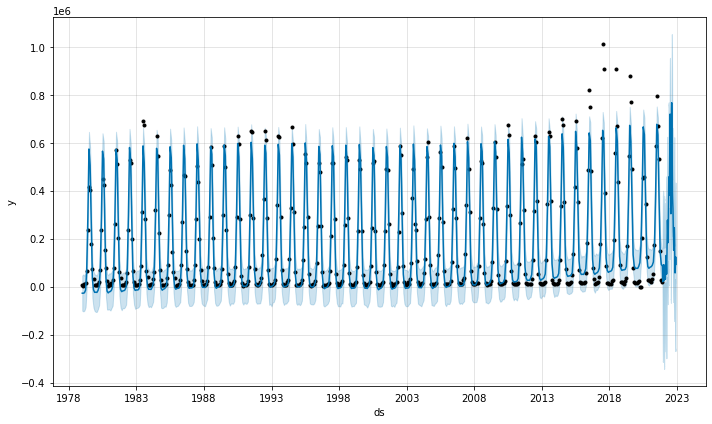

In [10]:
plot1 = m.plot(forecast)

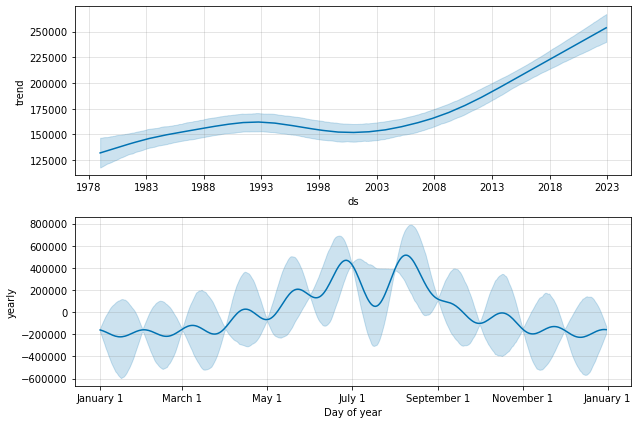

In [11]:
plt2 = m.plot_components(forecast)

Now we will build some seasonal models to compare to the models without the built in uncertainty

In [12]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

10:05:47 - cmdstanpy - INFO - Chain [1] start processing
10:05:47 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,33251.600344,-131773.467381,84280.117805,33251.600344,33251.600344,-52168.526563,-52168.526563,-52168.526563,107638.770186,107638.770186,107638.770186,-159807.296749,-159807.296749,-159807.296749,0.0,0.0,0.0,-18916.926218
1,1979-02-01,33359.146820,-131462.692954,81843.779811,33359.146820,33359.146820,-51789.486889,-51789.486889,-51789.486889,107638.770186,107638.770186,107638.770186,-159428.257075,-159428.257075,-159428.257075,0.0,0.0,0.0,-18430.340069
2,1979-03-01,33456.285572,-127027.998503,88257.514749,33456.285572,33456.285572,-49659.686794,-49659.686794,-49659.686794,107638.770186,107638.770186,107638.770186,-157298.456980,-157298.456980,-157298.456980,0.0,0.0,0.0,-16203.401222
3,1979-04-01,33563.832048,-105133.628049,105550.585475,33563.832048,33563.832048,-38979.296788,-38979.296788,-38979.296788,107638.770186,107638.770186,107638.770186,-146618.066974,-146618.066974,-146618.066974,0.0,0.0,0.0,-5415.464740
4,1979-05-01,33667.909282,-35461.257126,184974.331771,33667.909282,33667.909282,39795.134799,39795.134799,39795.134799,107638.770186,107638.770186,107638.770186,-67843.635387,-67843.635387,-67843.635387,0.0,0.0,0.0,73463.044081


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
876,2022-11-27,141133.832214,9288.340609,215391.719341,140755.559183,141534.357022,-29444.092617,-29444.092617,-29444.092617,107638.770186,107638.770186,107638.770186,-137082.862803,-137082.862803,-137082.862803,0.0,0.0,0.0,111689.739597
877,2022-11-28,141149.326624,8172.521525,216973.097361,140770.303333,141551.650763,-34285.747481,-34285.747481,-34285.747481,107638.770186,107638.770186,107638.770186,-141924.517667,-141924.517667,-141924.517667,0.0,0.0,0.0,106863.579143
878,2022-11-29,141164.821035,-4682.486557,202764.344554,140785.047484,141568.944505,-40042.783334,-40042.783334,-40042.783334,107638.770186,107638.770186,107638.770186,-147681.553520,-147681.553520,-147681.553520,0.0,0.0,0.0,101122.037701
879,2022-11-30,141180.315445,-17482.679445,208036.376674,140799.791635,141586.238246,-46557.804051,-46557.804051,-46557.804051,107638.770186,107638.770186,107638.770186,-154196.574237,-154196.574237,-154196.574237,0.0,0.0,0.0,94622.511394
880,2022-12-01,141195.809856,-19918.382218,202838.071694,140814.535786,141603.531988,-53650.158194,-53650.158194,-53650.158194,107638.770186,107638.770186,107638.770186,-161288.928380,-161288.928380,-161288.928380,0.0,0.0,0.0,87545.651662


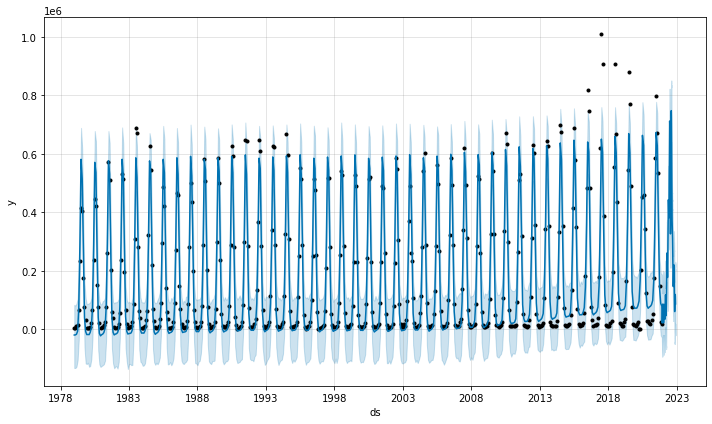

In [14]:
plot1 = m.plot(forecast)

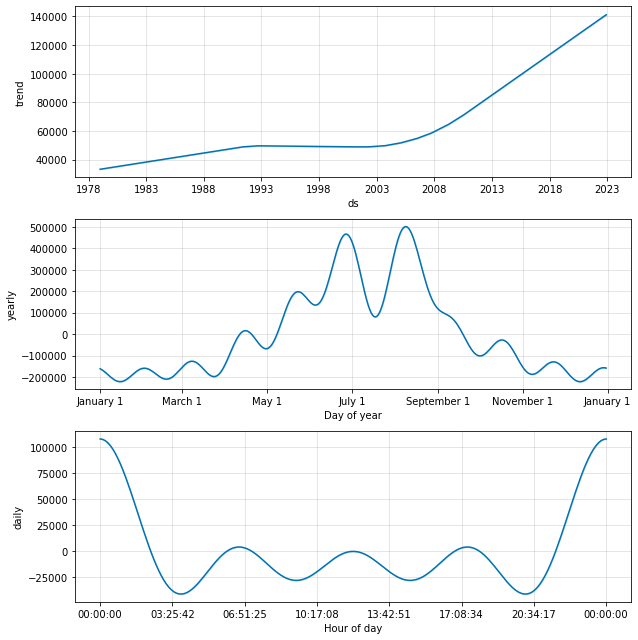

In [15]:
plt2 = m.plot_components(forecast)

Lastly I want to show a able of the uncertainty and how it fluctuates with time based on the model

In [16]:
# Taken from https://github.com/fred-lindsey/daily-viz/blob/main/bb_np_forecasting.ipynb

# Cross Validation
from prophet.diagnostics import cross_validation
df_cross_val = cross_validation(model, initial = '7300 days', period = '180 days', horizon = '365 days')

  0%|          | 0/45 [00:00<?, ?it/s]

10:06:00 - cmdstanpy - INFO - Chain [1] start processing
10:06:00 - cmdstanpy - INFO - Chain [1] done processing
10:06:01 - cmdstanpy - INFO - Chain [1] start processing
10:06:01 - cmdstanpy - INFO - Chain [1] done processing
10:06:02 - cmdstanpy - INFO - Chain [1] start processing
10:06:02 - cmdstanpy - INFO - Chain [1] done processing
10:06:02 - cmdstanpy - INFO - Chain [1] start processing
10:06:02 - cmdstanpy - INFO - Chain [1] done processing
10:06:02 - cmdstanpy - INFO - Chain [1] start processing
10:06:02 - cmdstanpy - INFO - Chain [1] done processing
10:06:03 - cmdstanpy - INFO - Chain [1] start processing
10:06:03 - cmdstanpy - INFO - Chain [1] done processing
10:06:03 - cmdstanpy - INFO - Chain [1] start processing
10:06:03 - cmdstanpy - INFO - Chain [1] done processing
10:06:04 - cmdstanpy - INFO - Chain [1] start processing
10:06:04 - cmdstanpy - INFO - Chain [1] done processing
10:06:04 - cmdstanpy - INFO - Chain [1] start processing
10:06:04 - cmdstanpy - INFO - Chain [1]

In [17]:
df_cross_val.ds.min(), df_cross_val.ds.max()

(Timestamp('1999-04-01 00:00:00'), Timestamp('2021-12-01 00:00:00'))

In [18]:
from prophet.diagnostics import performance_metrics
# Now we are going to compare predicted values (y_hat) with the actuals, for a cross validation error reading (RMSE)
df_performance = performance_metrics(df_cross_val)
df_performance.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.720428e+09,93383.232704,56633.789736,0.386256,0.520106,0.792453
1,39 days,8.714635e+09,93352.209618,56436.977371,0.386256,0.518266,0.792453
2,40 days,8.708100e+09,93317.200358,56152.164129,0.371301,0.504883,0.792453
3,41 days,8.467464e+09,92018.824135,54731.386647,0.386256,0.525667,0.830189
4,42 days,9.390403e+09,96904.093661,56327.334261,0.371301,0.513861,0.830189


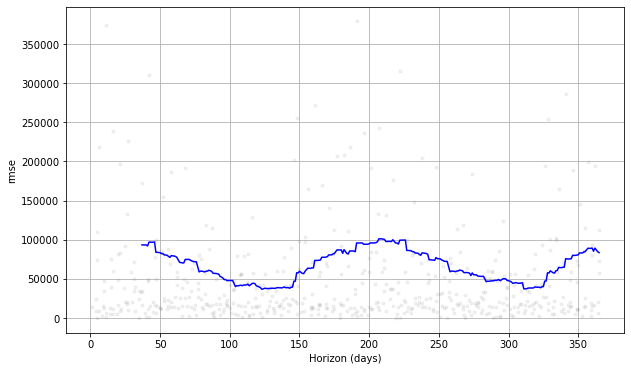

In [19]:
# Now let's plot it
from prophet.plot import plot_cross_validation_metric
visual_cross_val = plot_cross_validation_metric(df_cross_val, metric='rmse')